In [5]:
import pandas as pd
from datasets import load_dataset
import matplotlib.pyplot as plt
import seaborn as sns
import contextily as cx
import os

plt.rcParams["figure.dpi"] = 300
sns.set_style("white")
os.makedirs('../cleaned_data/filted_data', exist_ok=True)

Derivating the list of restaurants' ids in the specified area (`loc_food_id`).

In [6]:
business = pd.read_json("../yelp_dataset/yelp_academic_dataset_business.json", lines=True)
business.head()

,business_id,name,address,city,state,postal_code,latitude,longitude,stars,review_count,is_open,attributes,categories,hours
0,Pns2l4eNsfO8kk83dixA6A,"Abby Rappoport, LAC, CMQ","1616 Chapala St, Ste 2",Santa Barbara,CA,93101,34.426679,-119.711197,5.0,7,0,{'ByAppointmentOnly': 'True'},"Doctors, Traditional Chinese Medicine, Naturop...",None
1,mpf3x-BjTdTEA3yCZrAYPw,The UPS Store,87 Grasso Plaza Shopping Center,Affton,MO,63123,38.551126,-90.335695,3.0,15,1,{'BusinessAcceptsCreditCards': 'True'},"Shipping Centers, Local Services, Notaries, Ma...","{'Monday': '0:0-0:0', 'Tuesday': '8:0-18:30', ..."
2,tUFrWirKiKi_TAnsVWINQQ,Target,5255 E Broadway Blvd,Tucson,AZ,85711,32.223236,-110.880452,3.5,22,0,"{'BikeParking': 'True', 'BusinessAcceptsCredit...","Department Stores, Shopping, Fashion, Home & G...","{'Monday': '8:0-22:0', 'Tuesday': '8:0-22:0', ..."
3,MTSW4McQd7CbVtyjqoe9mw,St Honore Pastries,935 Race St,Philadelphia,PA,19107,39.955505,-75.155564,4.0,80,1,"{'RestaurantsDelivery': 'False', 'OutdoorSeati...","Restaurants, Food, Bubble Tea, Coffee & Tea, B...","{'Monday': '7:0-20:0', 'Tuesday': '7:0-20:0', ..."
4,mWMc6_wTdE0EUBKIGXDVfA,Perkiomen Valley Brewery,101 Walnut St,Green Lane,PA,18054,40.338183,-75.471659,4.5,13,1,"{'BusinessAcceptsCreditCards': 'True', 'Wheelc...","Brewpubs, Breweries, Food","{'Wednesday': '14:0-22:0', 'Thursday': '16:0-2..."


In [7]:
print(business.shape)

(150346, 14)


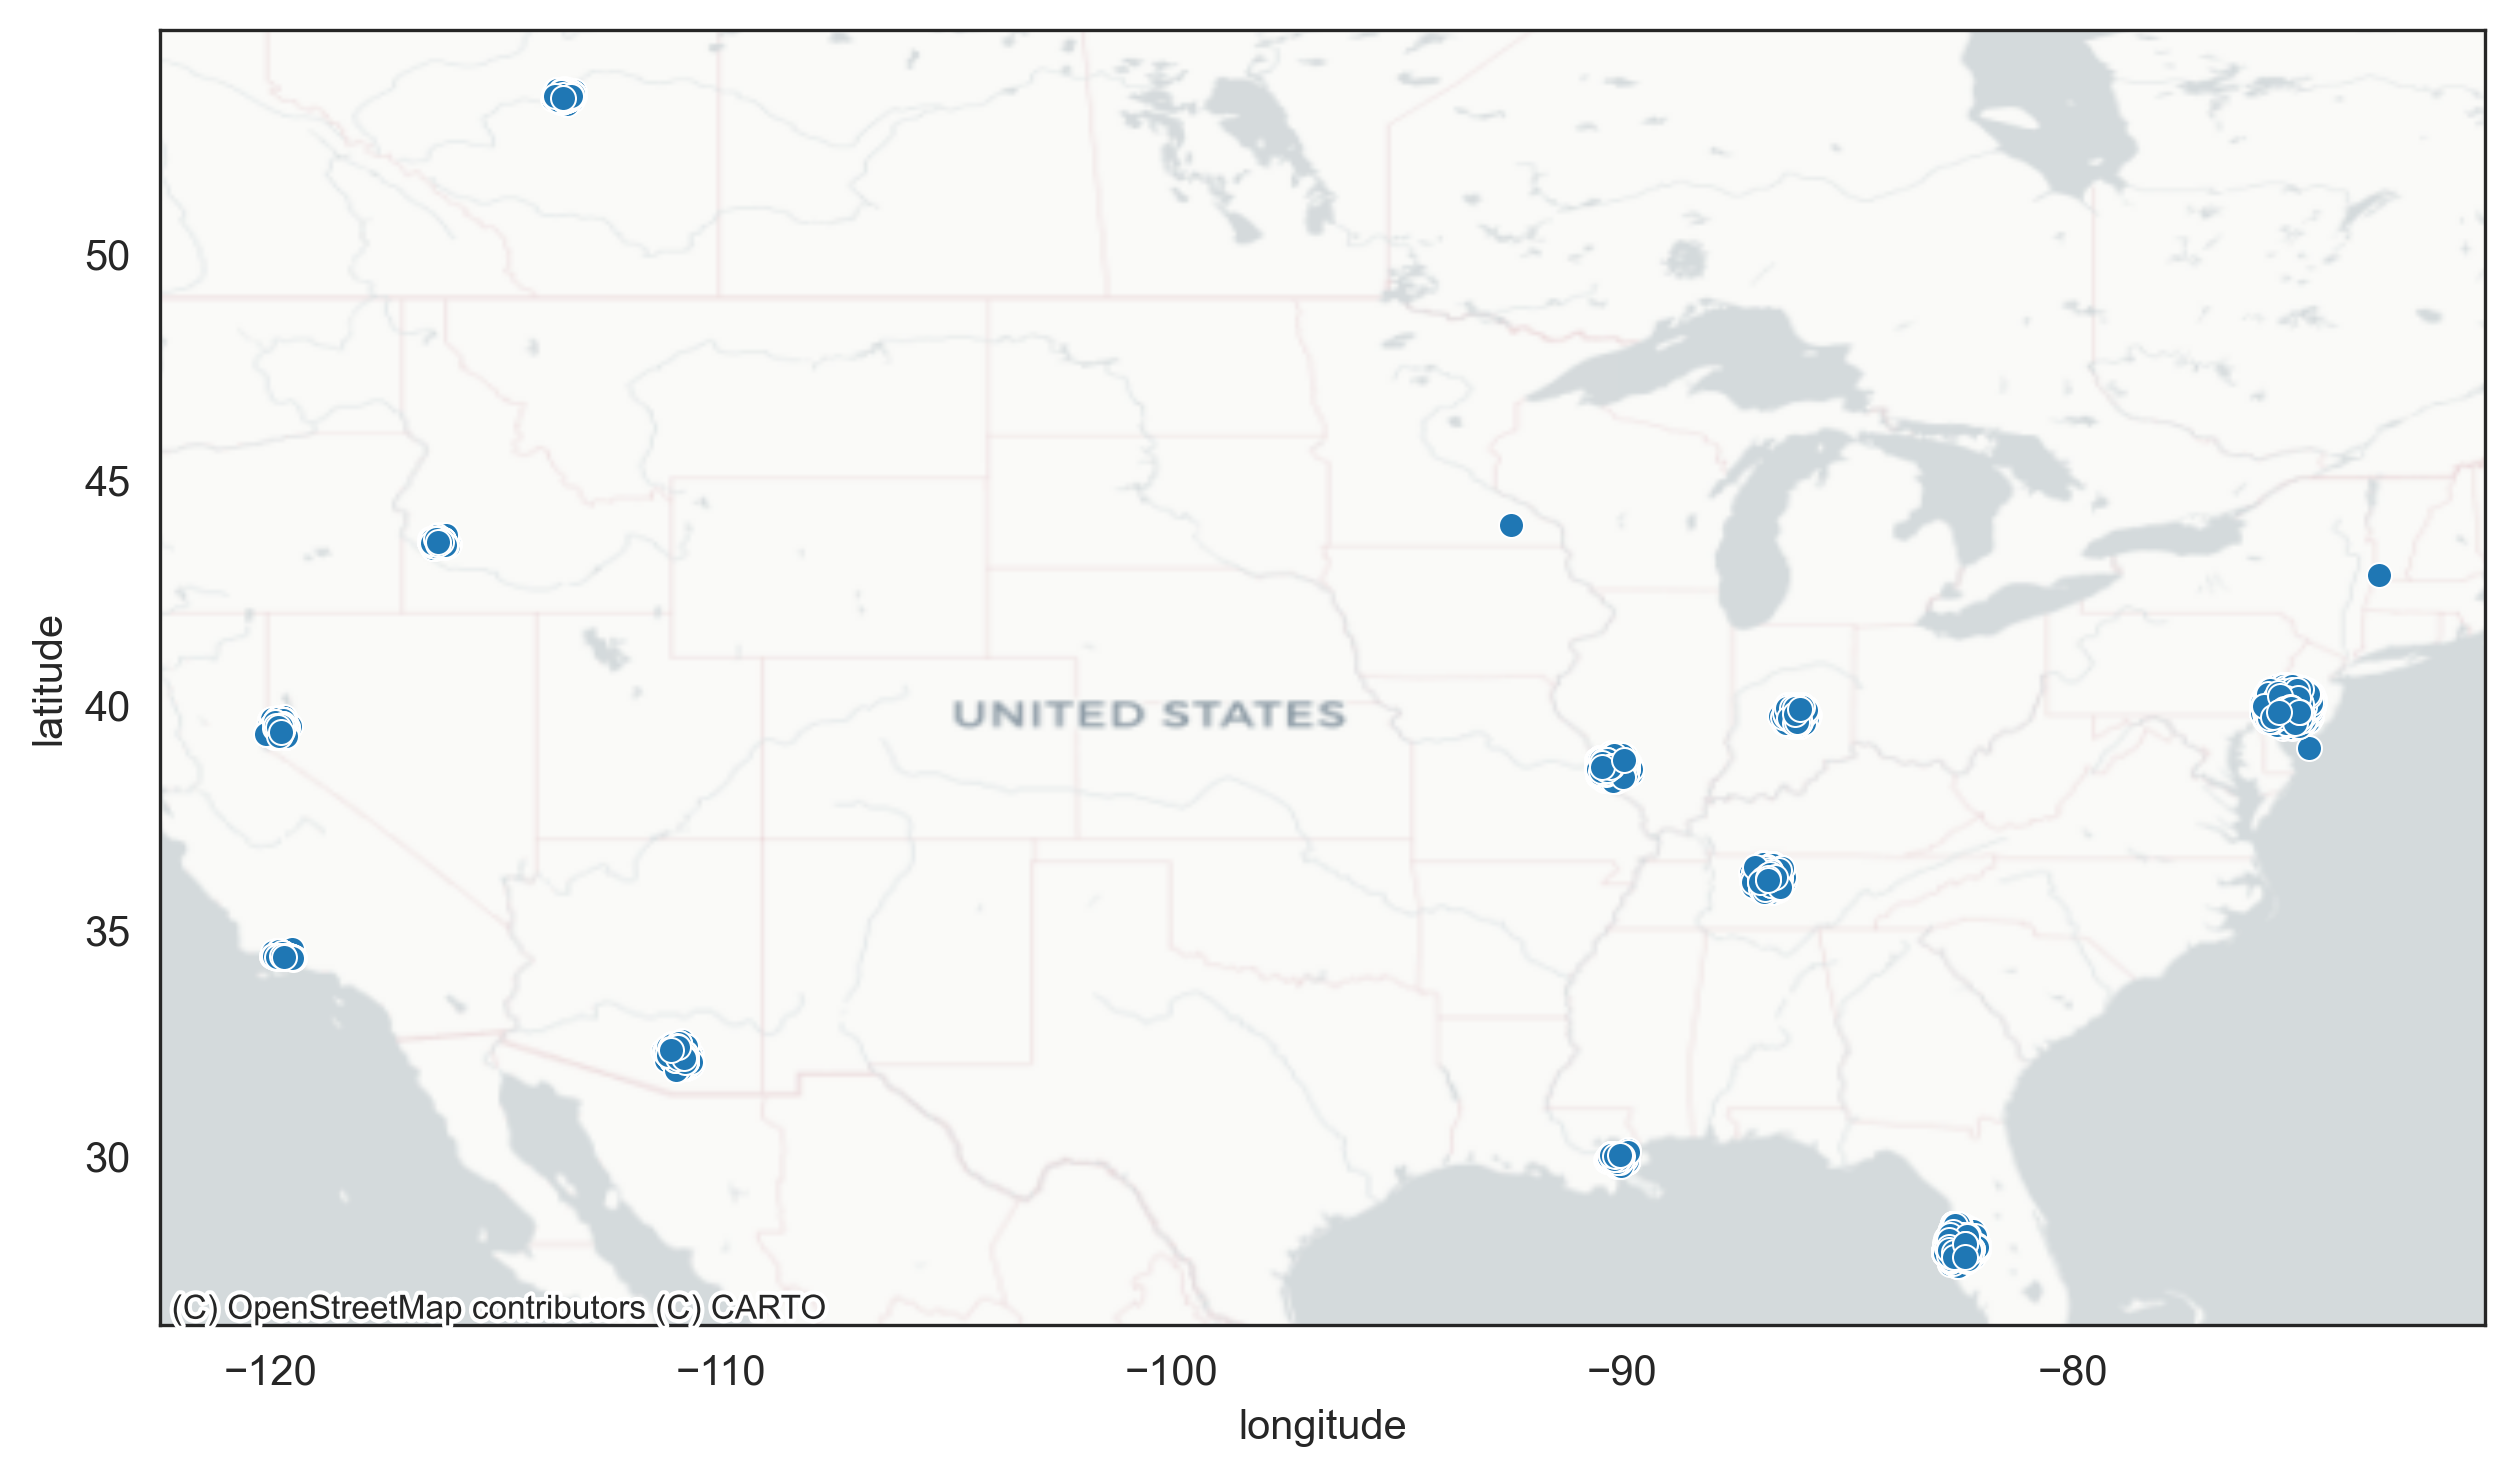

In [8]:
fig, ax = plt.subplots(figsize=(10, 10))
sns.scatterplot(
    data=business[["latitude", "longitude"]], x="longitude", y="latitude", ax=ax
)
cx.add_basemap(ax, source=cx.providers.CartoDB.Positron, crs="EPSG:4326") # stamen of old version has been removed
plt.show()

In [9]:
loc = (business["latitude"] < 31.5) * (business["longitude"] < -85) # Choose the area range.
food = business["categories"].map(
    lambda x: "Food" in x.split(", ") or "Restaurants" in x.split(", ") if x else False
)
loc_food_id = business[loc * food]["business_id"].to_list()
len(loc_food_id)

4509

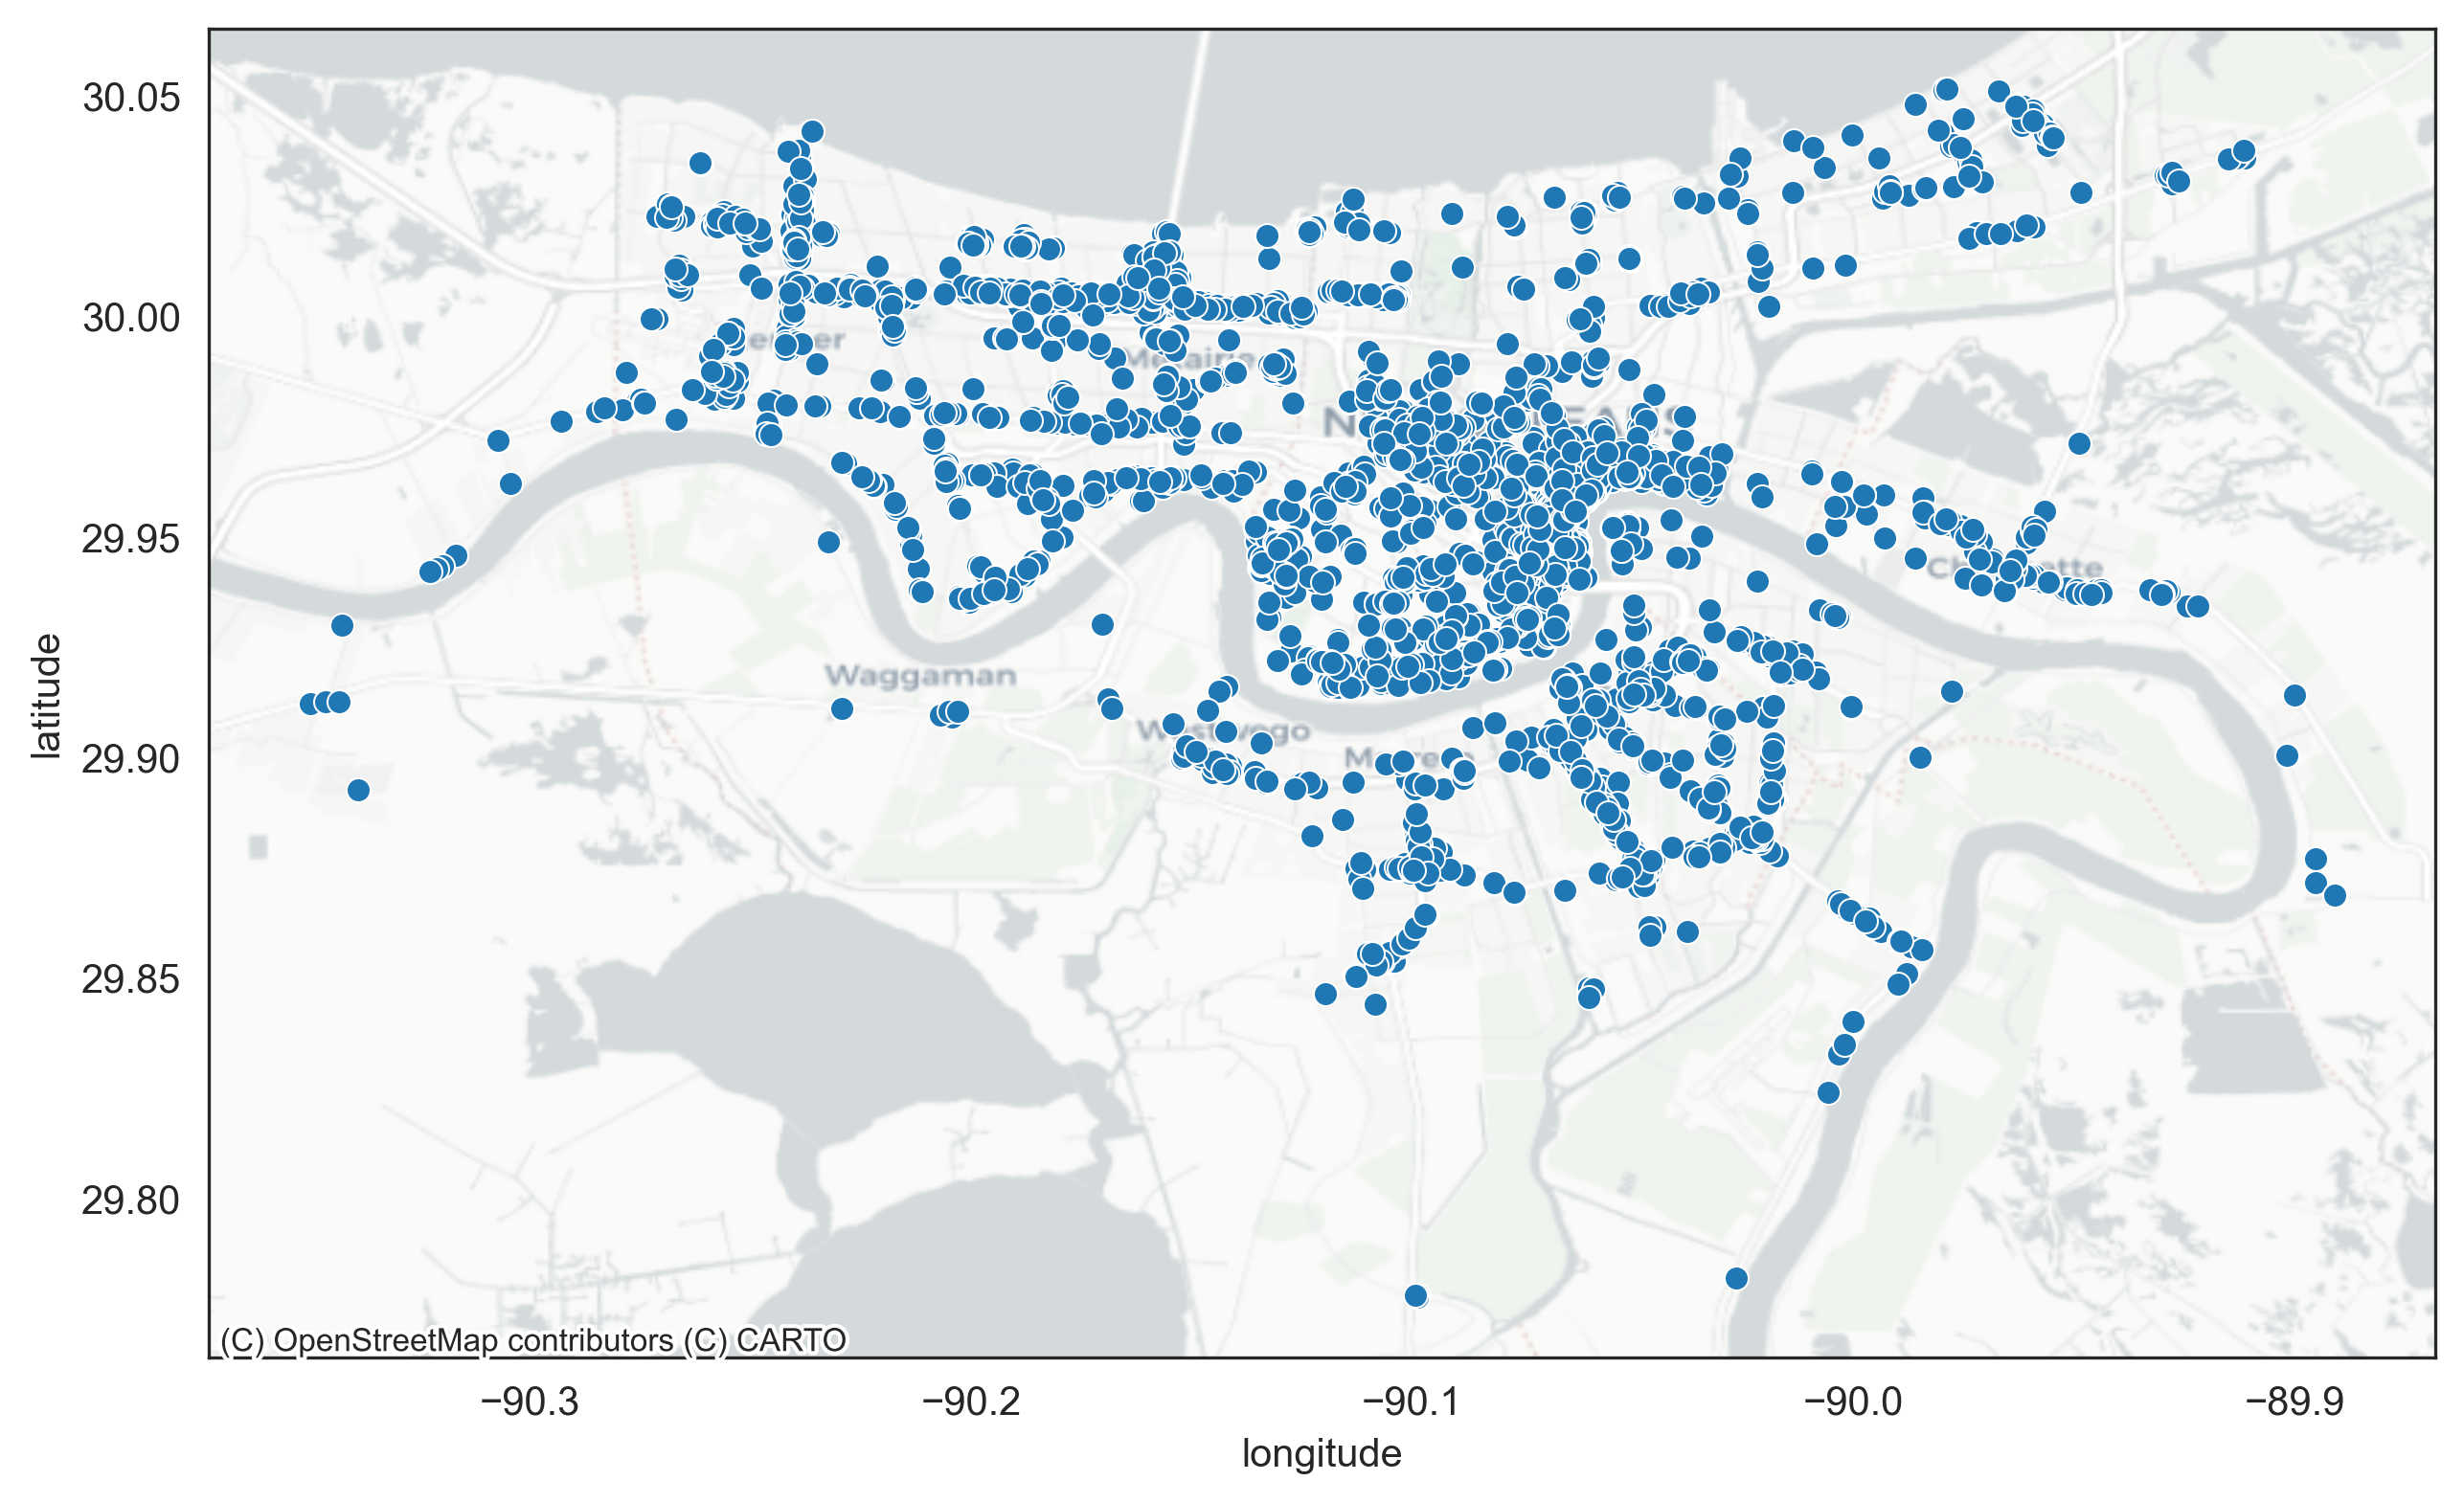

In [10]:
fig, ax = plt.subplots(figsize=(10, 10))
sns.scatterplot(
    data=business[loc * food][["latitude", "longitude"]],
    x="longitude",
    y="latitude",
    ax=ax,
)
cx.add_basemap(ax, source=cx.providers.CartoDB.Positron, crs="EPSG:4326")

In [11]:
checkin = pd.read_json("../yelp_dataset/yelp_academic_dataset_checkin.json", lines=True)
checkin.head()

,business_id,date
0,---kPU91CF4Lq2-WlRu9Lw,"2020-03-13 21:10:56, 2020-06-02 22:18:06, 2020..."
1,--0iUa4sNDFiZFrAdIWhZQ,"2010-09-13 21:43:09, 2011-05-04 23:08:15, 2011..."
2,--30_8IhuyMHbSOcNWd6DQ,"2013-06-14 23:29:17, 2014-08-13 23:20:22"
3,--7PUidqRWpRSpXebiyxTg,"2011-02-15 17:12:00, 2011-07-28 02:46:10, 2012..."
4,--7jw19RH9JKXgFohspgQw,"2014-04-21 20:42:11, 2014-04-28 21:04:46, 2014..."


In [12]:
print(checkin.shape)

(131930, 2)


In [13]:
checkin_id_set = set(checkin["business_id"])
loc_food_id = [i for i in loc_food_id if i in checkin_id_set]
len(loc_food_id)

4449

Filtering the datasets with `loc_food_id` and saving.

In [14]:
tip = pd.read_json("../yelp_dataset/yelp_academic_dataset_tip.json", lines=True)
tip.head()

,user_id,business_id,text,date,compliment_count
0,AGNUgVwnZUey3gcPCJ76iw,3uLgwr0qeCNMjKenHJwPGQ,Avengers time with the ladies.,2012-05-18 02:17:21,0
1,NBN4MgHP9D3cw--SnauTkA,QoezRbYQncpRqyrLH6Iqjg,They have lots of good deserts and tasty cuban...,2013-02-05 18:35:10,0
2,-copOvldyKh1qr-vzkDEvw,MYoRNLb5chwjQe3c_k37Gg,It's open even when you think it isn't,2013-08-18 00:56:08,0
3,FjMQVZjSqY8syIO-53KFKw,hV-bABTK-glh5wj31ps_Jw,Very decent fried chicken,2017-06-27 23:05:38,0
4,ld0AperBXk1h6UbqmM80zw,_uN0OudeJ3Zl_tf6nxg5ww,Appetizers.. platter special for lunch,2012-10-06 19:43:09,0


In [15]:
print(tip.shape)

(908915, 5)


In [ ]:
review_dataset = load_dataset("json", data_files="../yelp_dataset/yelp_academic_dataset_review.json")
chunks = pd.read_json("../yelp_dataset/yelp_academic_dataset_review.json",lines=True, chunksize=8)
fst_8_rows = next(chunks)
print(fst_8_rows)

                review_id                 user_id             business_id  \
0  KU_O5udG6zpxOg-VcAEodg  mh_-eMZ6K5RLWhZyISBhwA  XQfwVwDr-v0ZS3_CbbE5Xw   
1  BiTunyQ73aT9WBnpR9DZGw  OyoGAe7OKpv6SyGZT5g77Q  7ATYjTIgM3jUlt4UM3IypQ   
2  saUsX_uimxRlCVr67Z4Jig  8g_iMtfSiwikVnbP2etR0A  YjUWPpI6HXG530lwP-fb2A   
3  AqPFMleE6RsU23_auESxiA  _7bHUi9Uuf5__HHc_Q8guQ  kxX2SOes4o-D3ZQBkiMRfA   
4  Sx8TMOWLNuJBWer-0pcmoA  bcjbaE6dDog4jkNY91ncLQ  e4Vwtrqf-wpJfwesgvdgxQ   
5  JrIxlS1TzJ-iCu79ul40cQ  eUta8W_HdHMXPzLBBZhL1A  04UD14gamNjLY0IDYVhHJg   
6  6AxgBCNX_PNTOxmbRSwcKQ  r3zeYsv1XFBRA4dJpL78cw  gmjsEdUsKpj9Xxu6pdjH0g   
7  _ZeMknuYdlQcUqng_Im3yg  yfFzsLmaWF2d4Sr0UNbBgg  LHSTtnW3YHCeUkRDGyJOyw   

   stars  useful  funny  cool  \
0      3       0      0     0   
1      5       1      0     1   
2      3       0      0     0   
3      5       1      0     1   
4      4       1      0     1   
5      1       1      2     1   
6      5       0      2     0   
7      5       2      0     0   

        

In [ ]:
business = business[business["business_id"].apply(lambda x: x in loc_food_id)]
checkin = checkin[checkin["business_id"].apply(lambda x: x in loc_food_id)]
tip = tip[tip["business_id"].apply(lambda x: x in loc_food_id)]
review = review_dataset.filter(lambda x: x["business_id"] in loc_food_id)

Filter:   0%|          | 0/6990280 [00:00<?, ? examples/s]

In [24]:
review = review["train"].to_pandas()
business.to_csv("../cleaned_data/filted_data/business.csv", index=False)
checkin.to_csv("../cleaned_data/filted_data/checkin.csv", index=False)
tip.to_csv("../cleaned_data/filted_data/tip.csv", index=False)
review.to_json("../cleaned_data/filted_data/review.json", orient="split", index=False)

Derivating the list of users' ids who had written a tip/review for those restaurants (`loc_food_user`).

In [25]:
loc_food_user = set(tip["user_id"].tolist() + review["user_id"].tolist())
len(loc_food_user)

232627

Filtering the dataset with `loc_food_user` and saving.

In [26]:
user_dataset = load_dataset("json", data_files="../yelp_dataset/yelp_academic_dataset_user.json")

Generating train split: 0 examples [00:00, ? examples/s]

In [27]:
user = user_dataset.filter(lambda x: x["user_id"] in loc_food_user)
user = user["train"].to_pandas()
user["friends"] = user["friends"].apply(lambda x: [i for i in x.split(", ") if i in loc_food_user] if x else [])

Filter:   0%|          | 0/1987897 [00:00<?, ? examples/s]

In [28]:
user.to_csv("../cleaned_data/filted_data/user.csv", index=False)